In [1]:
from ROOT import TFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Welcome to JupyROOT 6.08/06


### Load the data

In [2]:
weightsFile=TFile.Open("degALL_a0a2Test_treeFlat_DSelector_UTweights.root")
nentries=weightsFile.degALL_a0a2Test_tree_flat.GetEntries()
UT_equalWeights=np.zeros(nentries)
UT_bestChiWeights=np.zeros(nentries)
UT_spectBestChiWeights=np.zeros(nentries)
UT_spectEqualWeights=np.zeros(nentries)
UT_probWeights=np.zeros(nentries)
UT_chiSqs=np.zeros(nentries)
UT_events=np.zeros(nentries)
UT_RFtimes=np.zeros(nentries)
UT_whichSignalRegions=np.zeros(nentries)
UT_isTruePi0Etas=np.zeros(nentries)
UT_beamPhotonMatchToThrowns=np.zeros(nentries)

UT_Mpi0etas=np.zeros(nentries)
UT_Mpi0etas_thrown=np.zeros(nentries)
UT_Mpi0s=np.zeros(nentries)
UT_Metas=np.zeros(nentries)
UT_Mpi0etas_meas=np.zeros(nentries)
UT_Mpi0s_meas=np.zeros(nentries)
UT_Metas_meas=np.zeros(nentries)
UT_AccWeights=np.zeros(nentries)

UT_cosTheta_eta_gjs=np.zeros(nentries)
UT_cosTheta_eta_gjs_meas=np.zeros(nentries)


for ievent,event in enumerate(weightsFile.degALL_a0a2Test_tree_flat):
    UT_equalWeights[ievent]=event.UT_equalWeights
    UT_chiSqs[ievent]=event.chiSq
    UT_bestChiWeights[ievent]=event.UT_bestChiWeights
    UT_spectBestChiWeights[ievent]=event.UT_spectBestChiWeights
    UT_spectEqualWeights[ievent]=event.UT_spectEqualWeights
    UT_probWeights[ievent]=event.UT_probWeights
    UT_events[ievent]=event.UT_uniqueEventNumbers
    UT_RFtimes[ievent]=event.rfTime
    UT_whichSignalRegions[ievent]=event.whichSignalRegion
    UT_isTruePi0Etas[ievent]=event.isTruePi0Eta
    UT_beamPhotonMatchToThrowns[ievent]=event.beamPhotonMatchToThrown
    UT_cosTheta_eta_gjs[ievent]=event.cosTheta_eta_gj
    UT_cosTheta_eta_gjs_meas[ievent]=event.cosTheta_eta_gj_meas
    
    UT_Mpi0etas[ievent]=event.Mpi0eta
    UT_Mpi0etas_thrown[ievent]=event.Mpi0eta_thrown
    UT_Mpi0etas_meas[ievent]=event.Mpi0eta_meas
    UT_Mpi0s[ievent]=event.Mpi0
    UT_Mpi0s_meas[ievent]=event.Mpi0_meas
    UT_Metas[ievent]=event.Meta
    UT_Metas_meas[ievent]=event.Meta_meas
    UT_AccWeights[ievent]=event.AccWeight

In [3]:
weightsDict={"equalWeights":UT_equalWeights,
             "chiSqs":UT_chiSqs,
             "bestChiWeights":UT_bestChiWeights,
             "spectBestChiWeights":UT_spectBestChiWeights,
             "spectEqualWeights":UT_spectEqualWeights,
             "probWeights":UT_probWeights,
             "eventNumber":UT_events,
             "rfTimes":UT_RFtimes,
             "whichSignalRegions":UT_whichSignalRegions,
             "isTruePi0Etas":UT_isTruePi0Etas,
             "beamPhotonMatchToThrowns":UT_beamPhotonMatchToThrowns,
             "cosTheta_eta_gjs":UT_cosTheta_eta_gjs,
             "cosTheta_eta_gjs_meas":UT_cosTheta_eta_gjs_meas,
             "Mpi0eta_thrown":UT_Mpi0etas_thrown,
             "Mpi0etas":UT_Mpi0etas,
             "Mpi0etas_meas":UT_Mpi0etas_meas,
             "Mpi0s":UT_Mpi0s,
             "Mpi0s_meas":UT_Mpi0s_meas,
             "Metas":UT_Metas,
             "Metas_meas":UT_Metas_meas,
             "AccWeights":UT_AccWeights
            }
df_weightsData=pd.DataFrame(weightsDict)

In [4]:
# Convert to bools
df_weightsData.beamPhotonMatchToThrowns=df_weightsData.beamPhotonMatchToThrowns.astype(bool)
df_weightsData.isTruePi0Etas=df_weightsData.isTruePi0Etas.astype(bool)

# Fill nan values to 0. This is from getting the p-values for large chiSqs.
df_weightsData.probWeights=df_weightsData.probWeights.fillna(0)

### Load the thrown information

In [5]:
weightsFile=TFile.Open("degALL_a0a2Test_tree_DSelector.root")
nentries=weightsFile.pi0eta__B4_M17_M7_Tree.GetEntries()
thrown_Mpi0etas=np.zeros(nentries)
thrown_events=np.zeros(nentries)

for ievent,event in enumerate(weightsFile.pi0eta__B4_M17_M7_Tree):
    thrown_Mpi0etas[ievent]=event.Mpi0eta_thrown
    thrown_events[ievent]=event.EventNumber

In [6]:
thrownDict={
    "Mpi0etas":thrown_Mpi0etas,
    "events":thrown_events
}
df_thrownData=pd.DataFrame(thrownDict)

### Make some checks

We had to do some unscrambling of event numbers due to MC producing multiple events with the same event number. After unscrambling lets see if the maximum event number agrees with the length of the thrownData. In principle the thrown data should have N events which should agree with the max event number after unscrambling

In [7]:
df_weightsData.eventNumber.max()

223367.0

In [8]:
len(df_thrownData)

223368

In [10]:
#assert(len(df_thrownData)==df_weightsData.eventNumber.max())

#### Integrated spect weights (bestChi,equal) are not equal! This is because there are a lot of times where the beam photon did not match/converge to every possible spectroscopic combo. The integrated spectBestChi is equal to the number of unique beam photons whereas equalWeights is equal to total number of combos * 1/Nspect. This is equal to the former only if EACH beam photon pairs with EACH spectroscopic combo which it does not always. 

#### Percent difference is small. Distributions look very similar

In [11]:
integratedWeightDiff=sum(df_weightsData.spectEqualWeights)-sum(df_weightsData.spectBestChiWeights)
print("Integrated spect weights: {0}".format(integratedWeightDiff))
percentDiff=abs(integratedWeightDiff)/sum(df_weightsData.spectEqualWeights)
print("Percent difference: {0}".format(percentDiff))
percentDiff

0.019709529458310053

Integrated spect weights: -25859.9096167
Percent difference: 0.0197095294583


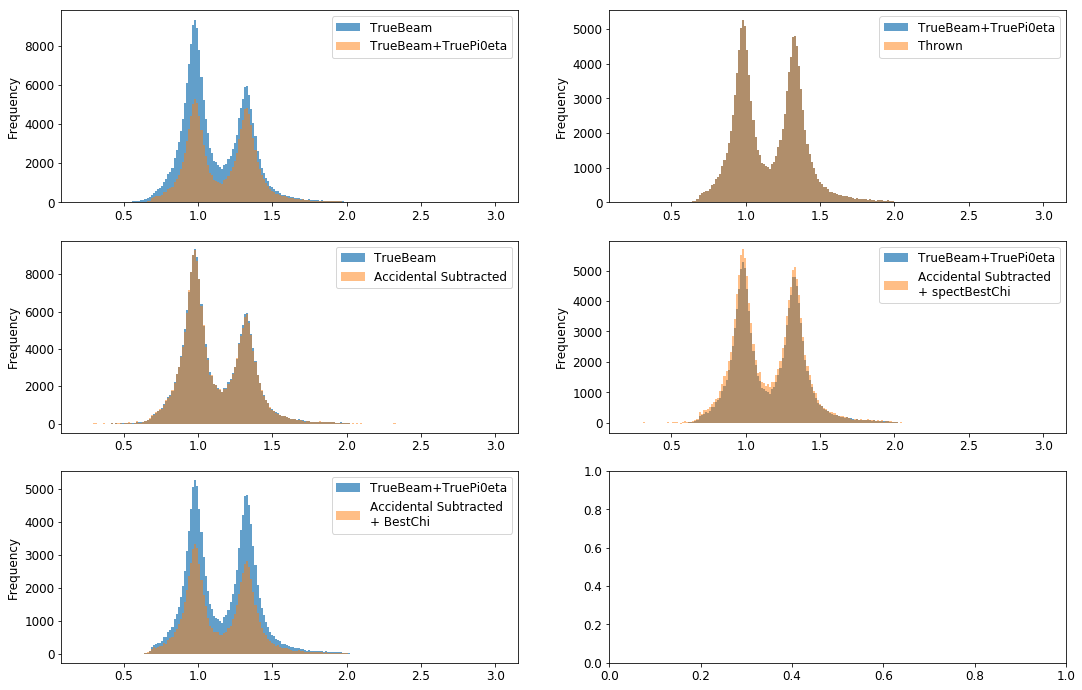

In [41]:
fig,ax=plt.subplots(3,2,figsize=(18,12))
ax=ax.flatten()
df_weightsDataSubset=df_weightsData[df_weightsData.beamPhotonMatchToThrowns==True]
binedges=np.histogram(df_weightsDataSubset.Mpi0etas,bins=200)[1]
df_weightsDataSubset.Mpi0etas.plot(kind="hist",bins=binedges,label="TrueBeam",ax=ax[0],alpha=0.7)
df_weightsDataSubset2=df_weightsDataSubset[df_weightsDataSubset.isTruePi0Etas==True]
df_weightsDataSubset2.Mpi0etas.plot(kind="hist",bins=binedges,label="TrueBeam+TruePi0eta",ax=ax[0],alpha=0.5)
ax[0].legend()

df_weightsDataSubset2.Mpi0etas.plot(kind="hist",bins=binedges,label="TrueBeam+TruePi0eta",ax=ax[1],alpha=0.7)
df_trueBeamPi0eta=df_weightsData[(df_weightsData.beamPhotonMatchToThrowns) & (df_weightsData.isTruePi0Etas)]
df_trueBeamPi0eta.Mpi0etas.plot(kind="hist",bins=binedges,ax=ax[1],label="Thrown",alpha=0.5)
ax[1].legend()

df_weightsDataSubset.Mpi0etas.plot(kind="hist",bins=binedges,label="TrueBeam",ax=ax[2],
                                   alpha=0.7)
df_weightsData.Mpi0etas.plot(kind="hist",bins=binedges,ax=ax[2],
                             weights=df_weightsData.AccWeights,alpha=0.5,label="Accidental Subtracted")
ax[2].legend()

df_weightsDataSubset2.Mpi0etas.plot(kind="hist",bins=binedges,label="TrueBeam+TruePi0eta",ax=ax[3],alpha=0.7)
df_weightsData.Mpi0etas.plot(kind="hist",bins=binedges,ax=ax[3],
                             weights=df_weightsData.AccWeights*df_weightsData.spectBestChiWeights,
                             alpha=0.5,label="Accidental Subtracted\n+ spectBestChi")
ax[3].legend()

df_weightsDataSubset2.Mpi0etas.plot(kind="hist",bins=binedges,label="TrueBeam+TruePi0eta",ax=ax[4],alpha=0.7)
df_weightsData.Mpi0etas.plot(kind="hist",bins=binedges,ax=ax[4],
                             weights=df_weightsData.AccWeights*df_weightsData.bestChiWeights,
                             alpha=0.5,label="Accidental Subtracted\n+ BestChi")
ax[4].legend()

In [13]:
# Make sure the events are the same between the two root files
np.prod(np.unique(UT_events)==np.unique(thrown_events))

sumWeighted=int(df_weightsData.equalWeights.sum())
sumBestChi=int(df_weightsData.bestChiWeights.sum())
sumProbWeights=int(df_weightsData.probWeights.sum())

sumThrown=len(df_thrownData["Mpi0etas"])

print("Sum weights = equal: {0}, bestChi: {1}, prob: {2}".format(sumWeighted,sumBestChi,sumProbWeights))
print(sumThrown)

Sum weights = equal: 223366, bestChi: 223367, prob: 222850
223368


/d/home/ln16/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


#### Checking how accidentals are subtracted in the RF time plot

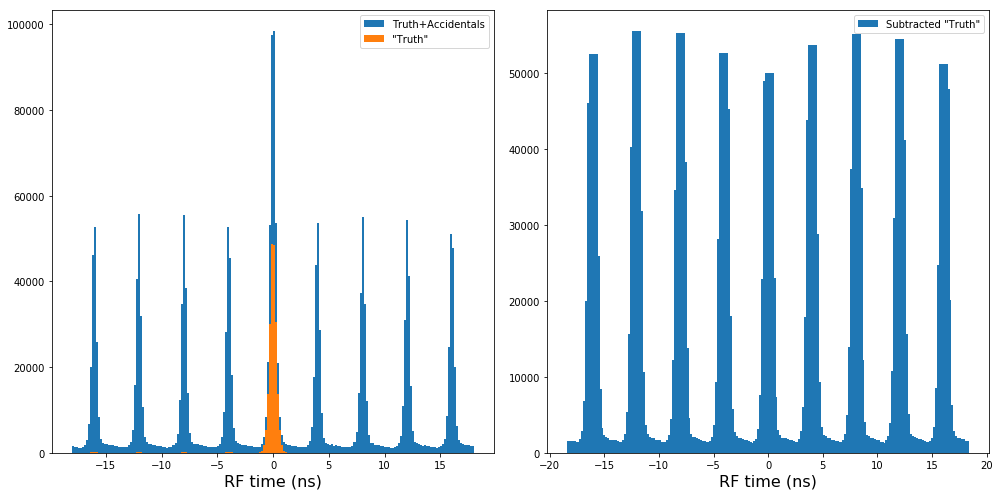

In [14]:
fig,ax=plt.subplots(1,2,figsize=(14,7))
counts, binedges=np.histogram(df_weightsData.rfTimes,bins=200)
countsTruth=np.histogram(df_weightsData[df_weightsData.beamPhotonMatchToThrowns==True].rfTimes,bins=binedges)[0]
plot1=ax[0].hist(df_weightsData.rfTimes,bins=binedges,label="Truth+Accidentals")
plot2=ax[0].hist(df_weightsData[df_weightsData.beamPhotonMatchToThrowns==True].rfTimes,
                 bins=binedges,label='"Truth"')

numTrue=sum(df_weightsData.beamPhotonMatchToThrowns==True)
numPrompt=len(df_weightsData[(df_weightsData.rfTimes>-2) & (df_weightsData.rfTimes<2)])
numAcc=len(df_weightsData[(df_weightsData.rfTimes<-2) | (df_weightsData.rfTimes>2)])

ax[0].legend()
ax[0].set_xlabel("RF time (ns)",size=16)
plot3=ax[1].bar(np.linspace(-18,18,200),height=(plot1[0]-plot2[0]),label='Subtracted "Truth"')
ax[1].set_xlabel("RF time (ns)",size=16)
ax[1].legend()
plt.tight_layout()

#### Checking total number of combos

Text(0.5,1,'Density plot of Combos No Selections Applied')

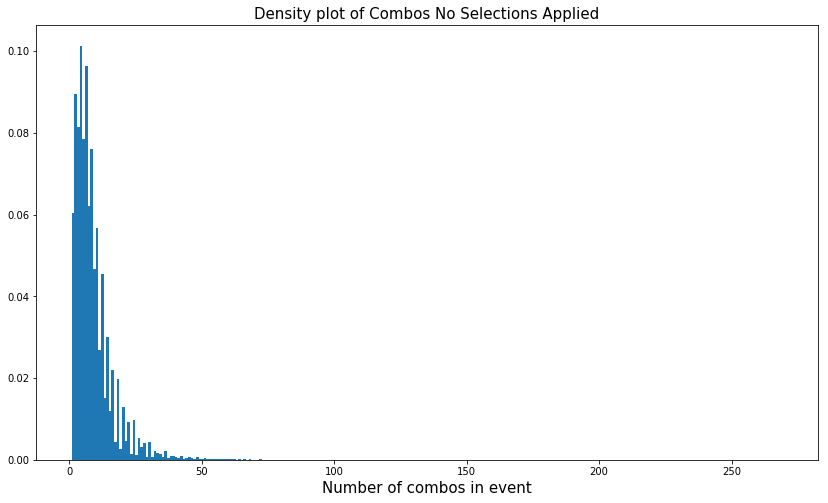

In [15]:
previousEvent=-1
combosPerEvent=[]
for ievent, eventNumber in enumerate(df_weightsData.eventNumber):
    if previousEvent!=eventNumber:
        combosPerEvent.append(1/df_weightsData.equalWeights[ievent])
        #print("There are {0} combos in event {1}".format(1/df_weightsData.equalWeights[ievent],eventNumber))
    previousEvent=eventNumber
combosPerEvent=np.array(combosPerEvent)

fig,ax = plt.subplots(1,1,figsize=(14,8))
ax.hist(combosPerEvent,bins=int(combosPerEvent.max()),density=True)
ax.set_xlabel("Number of combos in event",size=15)
ax.set_title("Density plot of Combos No Selections Applied",size=15)

#### Checking effects of accidental subtraction on various mass plots

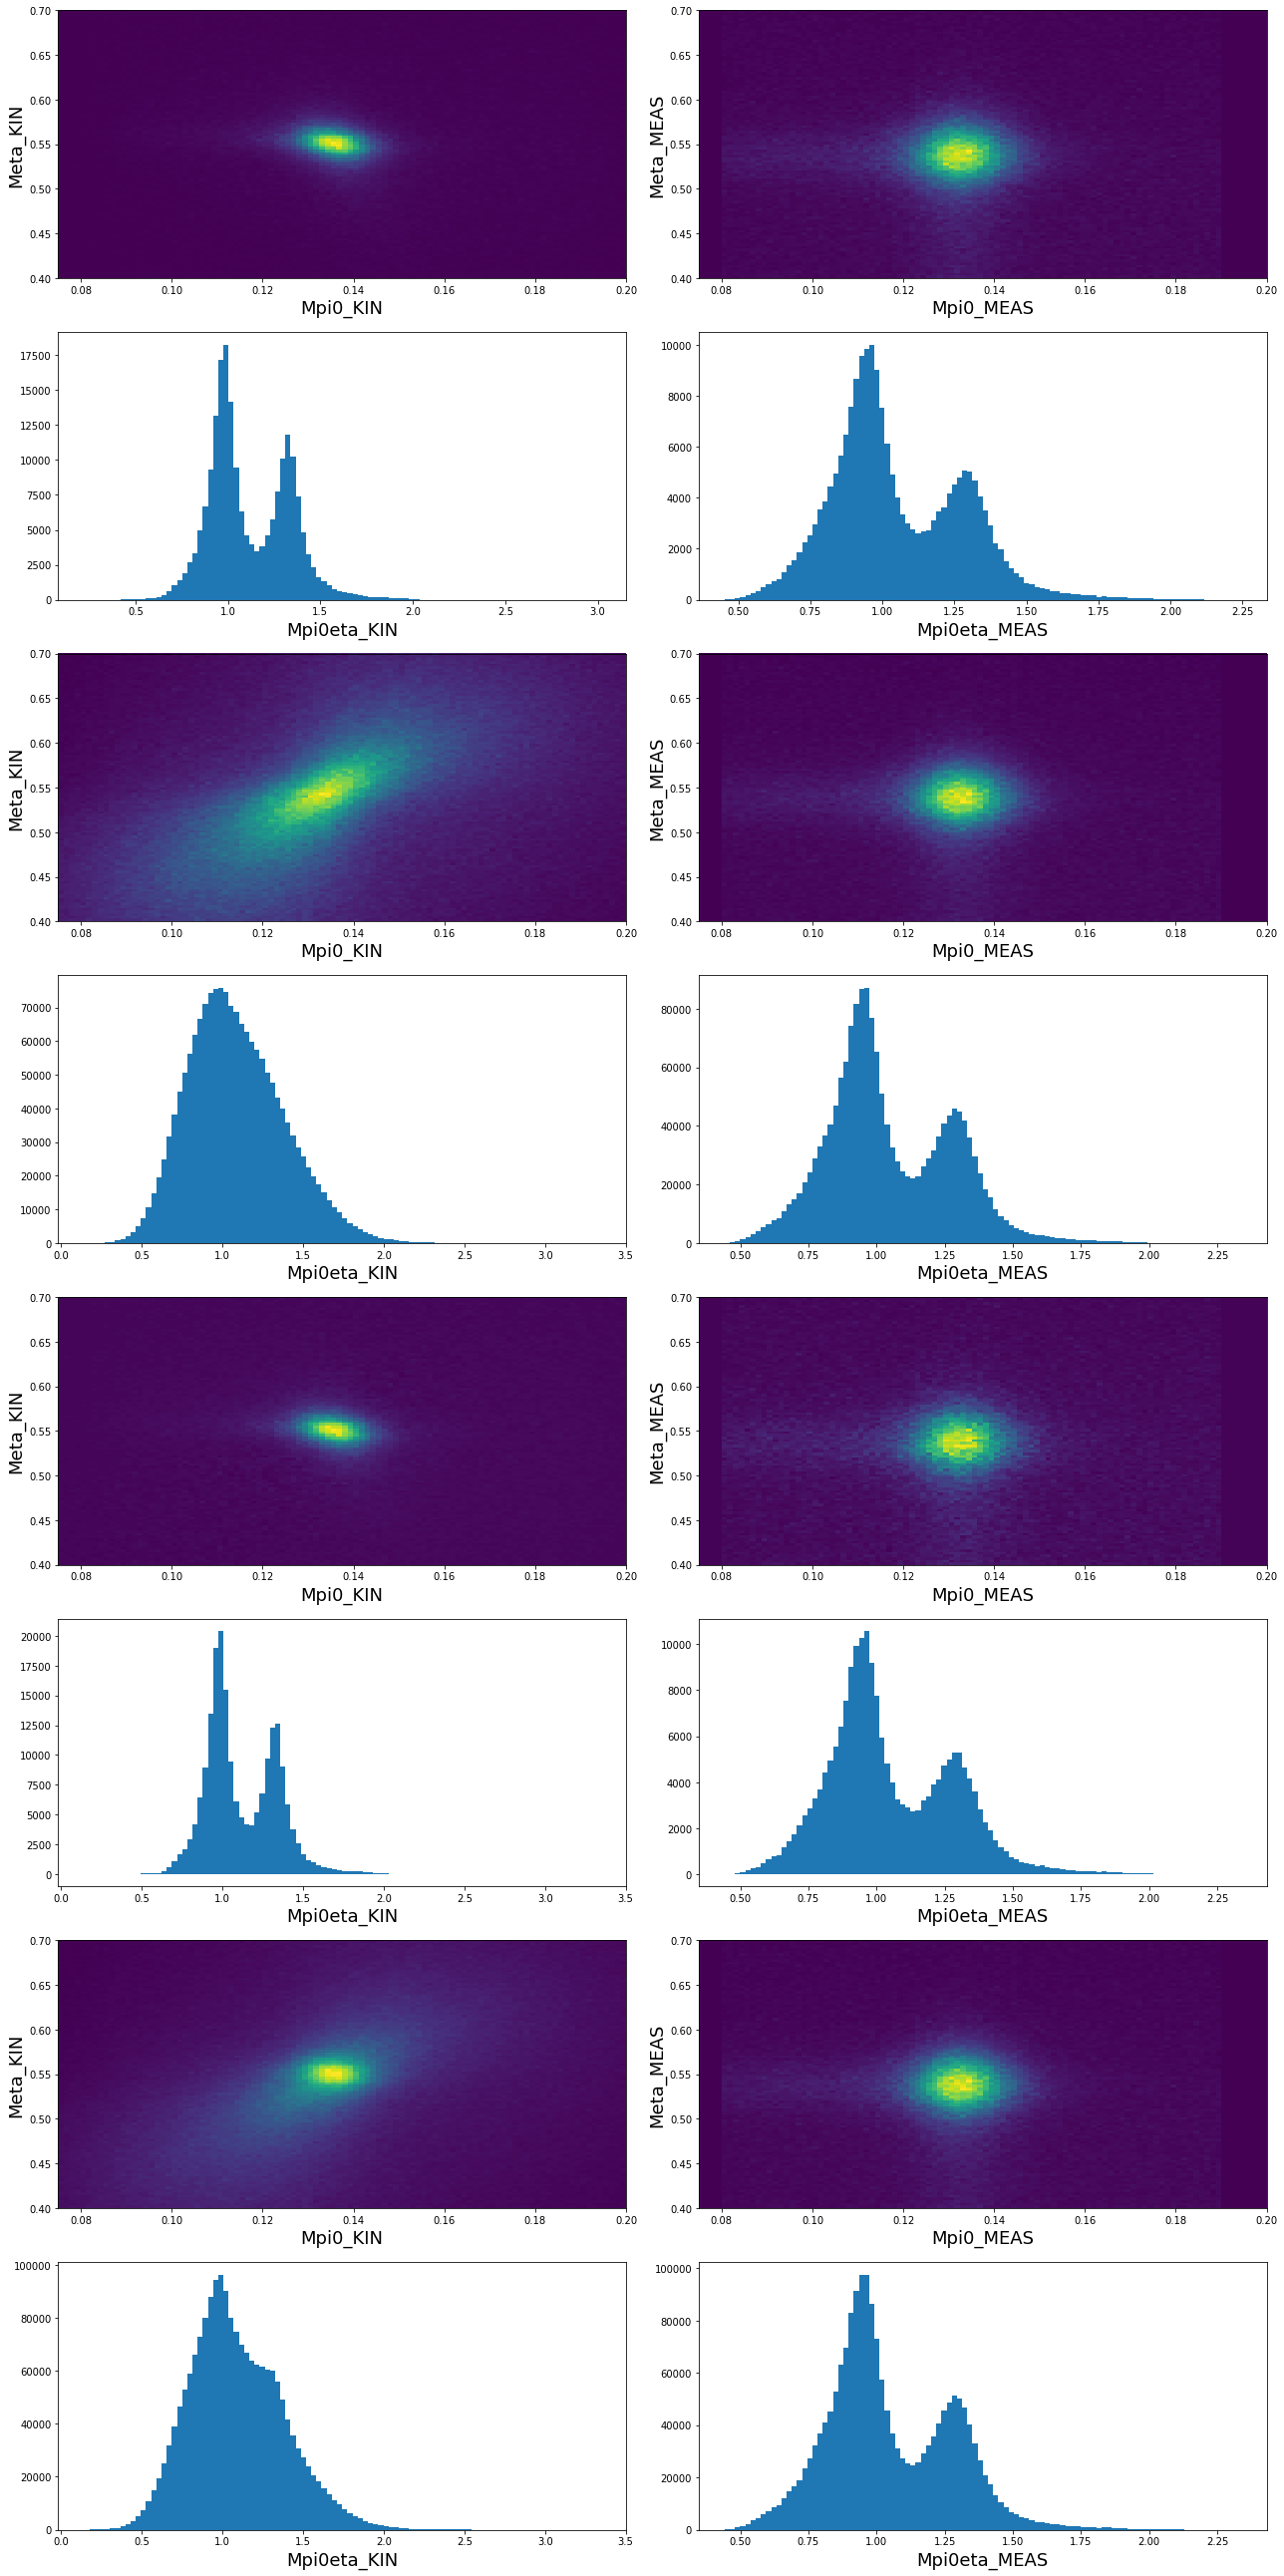

In [16]:
fig,axes=plt.subplots(8,2,figsize=(18,36))
for i,isTrueBeam in enumerate([True,False]):
    df_weightsDataSubset=df_weightsData[df_weightsData.beamPhotonMatchToThrowns==isTrueBeam]
    axes=axes.flatten()
    axes[0+i*4].hist2d(df_weightsDataSubset.Mpi0s,df_weightsDataSubset.Metas,
                       bins=(100,100),range=[[0.075,0.2],[0.4,0.7]]
                      )
    axes[0+i*4].set_xlabel("Mpi0_KIN",size=18)
    axes[0+i*4].set_ylabel("Meta_KIN",size=18)
    axes[1+i*4].hist2d(df_weightsDataSubset.Mpi0s_meas,df_weightsDataSubset.Metas_meas,
                       bins=(100,100),range=[[0.075,0.2],[0.4,0.7]]
                      )
    axes[1+i*4].set_xlabel("Mpi0_MEAS",size=18)
    axes[1+i*4].set_ylabel("Meta_MEAS",size=18)
    axes[2+i*4].hist(df_weightsDataSubset.Mpi0etas,bins=100)
    axes[2+i*4].set_xlabel("Mpi0eta_KIN",size=18)
    axes[3+i*4].hist(df_weightsDataSubset.Mpi0etas_meas,bins=100)
    axes[3+i*4].set_xlabel("Mpi0eta_MEAS",size=18)

    
# Accidental Weighted    
axes[8].hist2d(df_weightsData.Mpi0s,df_weightsData.Metas, weights=df_weightsData.AccWeights,
                       bins=(100,100),range=[[0.075,0.2],[0.4,0.7]]
                      )
axes[8].set_xlabel("Mpi0_KIN",size=18)
axes[8].set_ylabel("Meta_KIN",size=18)
axes[9].hist2d(df_weightsData.Mpi0s_meas,df_weightsData.Metas_meas, weights=df_weightsData.AccWeights,
                       bins=(100,100),range=[[0.075,0.2],[0.4,0.7]]
                      )
axes[9].set_xlabel("Mpi0_MEAS",size=18)
axes[9].set_ylabel("Meta_MEAS",size=18)
axes[10].hist(df_weightsData.Mpi0etas,bins=100, weights=df_weightsData.AccWeights)
axes[10].set_xlabel("Mpi0eta_KIN",size=18)
axes[11].hist(df_weightsData.Mpi0etas_meas,bins=100, weights=df_weightsData.AccWeights)
axes[11].set_xlabel("Mpi0eta_MEAS",size=18)


# Both true and accidentals but not accidental weighted
axes[12].hist2d(df_weightsData.Mpi0s,df_weightsData.Metas,
                       bins=(100,100),range=[[0.075,0.2],[0.4,0.7]]
                      )
axes[12].set_xlabel("Mpi0_KIN",size=18)
axes[12].set_ylabel("Meta_KIN",size=18)
axes[13].hist2d(df_weightsData.Mpi0s_meas,df_weightsData.Metas_meas,
                       bins=(100,100),range=[[0.075,0.2],[0.4,0.7]]
                      )
axes[13].set_xlabel("Mpi0_MEAS",size=18)
axes[13].set_ylabel("Meta_MEAS",size=18)
axes[14].hist(df_weightsData.Mpi0etas,bins=100)
axes[14].set_xlabel("Mpi0eta_KIN",size=18)
axes[15].hist(df_weightsData.Mpi0etas_meas,bins=100)
axes[15].set_xlabel("Mpi0eta_MEAS",size=18)
    
plt.tight_layout()
plt.rcParams.update({'font.size': 12})

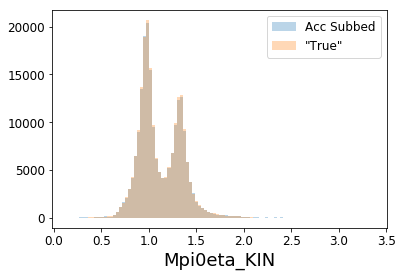

In [37]:
binedges=np.histogram(df_weightsData.Mpi0etas,bins=100)[1]
df_weightsDataSubset=df_weightsData[df_weightsData.beamPhotonMatchToThrowns==1]
fig,ax=plt.subplots(1,1)
ax.hist(df_weightsData.Mpi0etas,bins=binedges, weights=df_weightsData.AccWeights,label="Acc Subbed",alpha=0.3)
ax.hist(df_weightsDataSubset.Mpi0etas,bins=binedges, label='"True"',alpha=0.3)
ax.set_xlabel("Mpi0eta_KIN",size=18)
ax.set_xlabel("Mpi0eta_KIN",size=18)
ax.legend()

#### Checking accidental subtraction on GJ angles

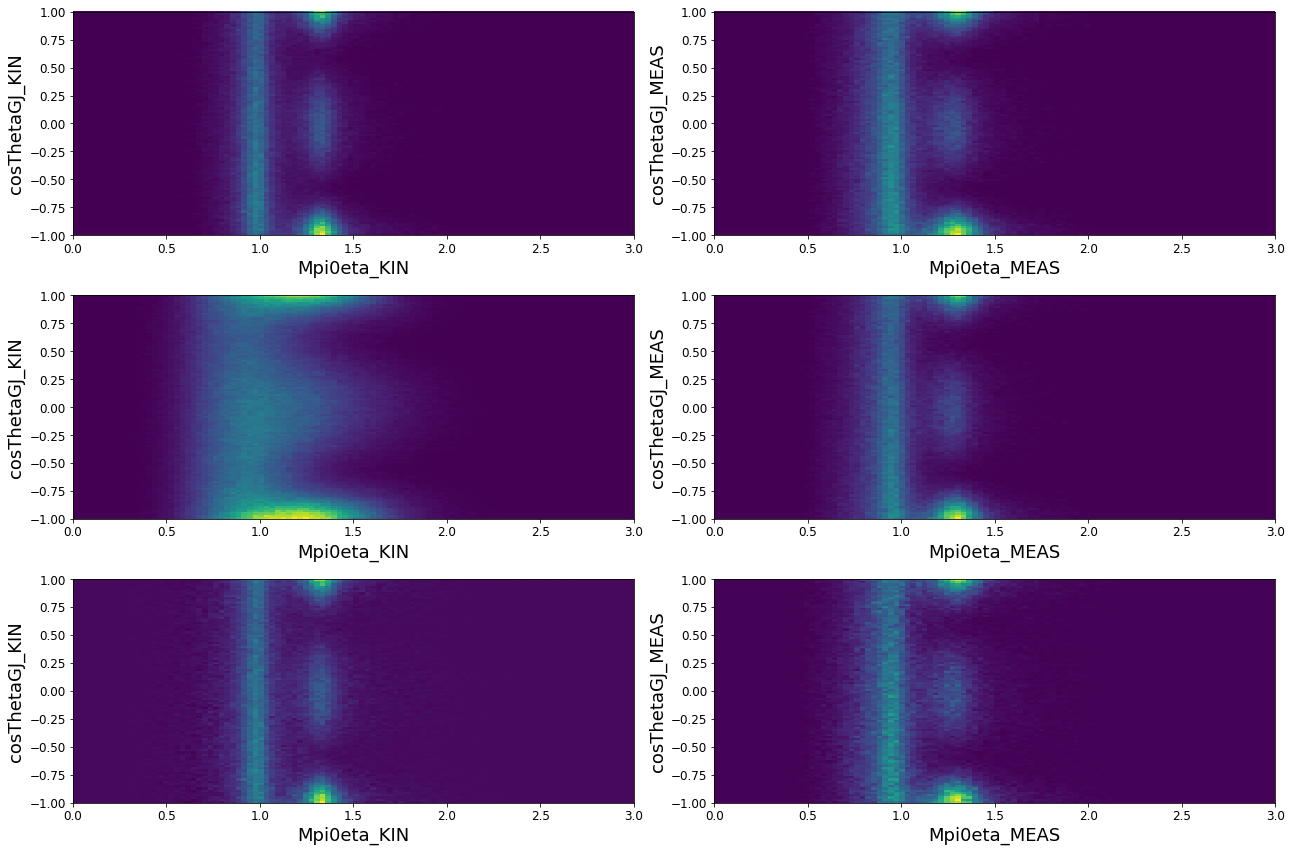

In [38]:
fig,axes=plt.subplots(3,2,figsize=(18,12))
labels=["True","Accidental"]
for i,isTrueBeam in enumerate([True,False]):
    df_weightsDataSubset=df_weightsData[df_weightsData.beamPhotonMatchToThrowns==isTrueBeam]
    axes=axes.flatten()
    axes[2*i].hist2d(df_weightsDataSubset.Mpi0etas,df_weightsDataSubset.cosTheta_eta_gjs,
                   bins=(100,100),range=[[0,3],[-1,1]],label="1231")
    axes[2*i].set_xlabel("Mpi0eta_KIN",size=18)
    axes[2*i].set_ylabel("cosThetaGJ_KIN",size=18)
    axes[2*i+1].hist2d(df_weightsDataSubset.Mpi0etas_meas,df_weightsDataSubset.cosTheta_eta_gjs_meas,
                   bins=(100,100),range=[[0,3],[-1,1]],label=labels[i])
    axes[2*i+1].set_xlabel("Mpi0eta_MEAS",size=18)
    axes[2*i+1].set_ylabel("cosThetaGJ_MEAS",size=18)
    
axes[4].hist2d(df_weightsData.Mpi0etas,df_weightsData.cosTheta_eta_gjs,
               bins=(100,100),range=[[0,3],[-1,1]],label=labels[i],
               weights=df_weightsData.AccWeights
              )
axes[4].set_xlabel("Mpi0eta_KIN",size=18)
axes[4].set_ylabel("cosThetaGJ_KIN",size=18)

axes[5].hist2d(df_weightsData.Mpi0etas_meas,df_weightsData.cosTheta_eta_gjs_meas,
                bins=(100,100),range=[[0,3],[-1,1]],label=labels[i],
                weights=df_weightsData.AccWeights
              )
axes[5].set_xlabel("Mpi0eta_MEAS",size=18)
axes[5].set_ylabel("cosThetaGJ_MEAS",size=18)
plt.tight_layout()
plt.savefig("comboTrackingGJ.png")

#### Old, without thinking about accidental subtraction, we compare the 3 different tracking schemes

In [19]:
binedges=np.histogram(df_thrownData.Mpi0etas,bins=50)[1]

In [20]:
df_weightsData["probWeights"][df_weightsData["probWeights"].isnull()]=0

/d/home/ln16/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


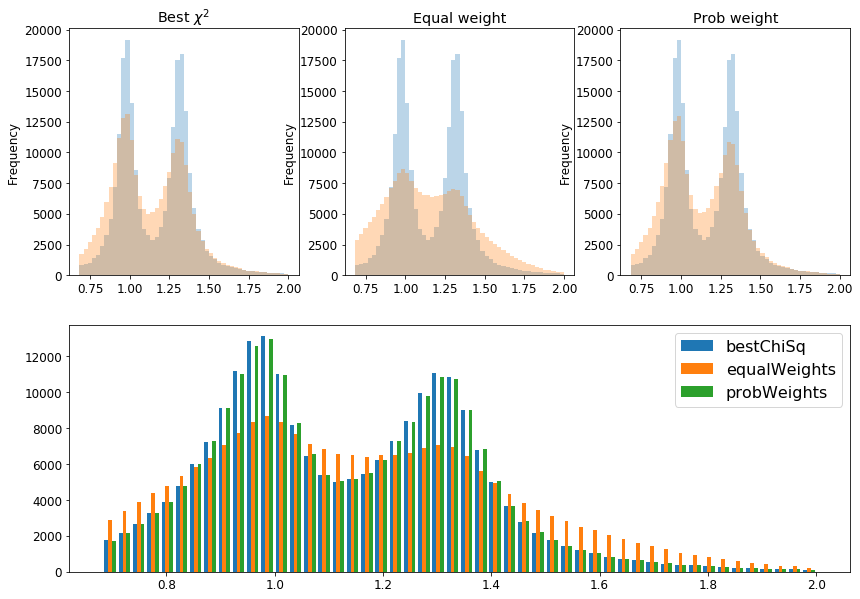

In [21]:
# fig,axes=plt.subplots(1,3,figsize=(18,6))
# ax=axes.flatten()

fig = plt.figure(figsize=(14, 10))
ax1= fig.add_subplot(2,3,1)
ax2= fig.add_subplot(2,3,2)
ax3= fig.add_subplot(2,3,3)
ax4= fig.add_subplot(2,1,2)

df_thrownDataSubset=df_thrownData[:-1]
df_weightsDataSubset=df_weightsData[:-1]

ax1.set_title("Best $\chi^2$")
df_thrownDataSubset["Mpi0etas"].plot(kind="hist",bins=binedges,alpha=0.3,ax=ax1)
df_weightsDataSubset["Mpi0etas"].plot(kind="hist",bins=binedges, weights=df_weightsDataSubset["bestChiWeights"],
                                alpha=0.3,ax=ax1)
ax2.set_title("Equal weight")
df_thrownDataSubset["Mpi0etas"].plot(kind="hist",bins=binedges,alpha=0.3,ax=ax2)
df_weightsDataSubset["Mpi0etas"].plot(kind="hist",bins=binedges, weights=df_weightsDataSubset["equalWeights"],
                                alpha=0.3,ax=ax2)
ax3.set_title("Prob weight")
df_thrownDataSubset["Mpi0etas"].plot(kind="hist",bins=binedges,alpha=0.3,ax=ax3)
df_weightsDataSubset["Mpi0etas"].plot(kind="hist",bins=binedges, weights=df_weightsDataSubset["probWeights"],
                                alpha=0.3,ax=ax3)
ax4.hist([df_weightsDataSubset["Mpi0etas"],df_weightsDataSubset["Mpi0etas"],df_weightsDataSubset["Mpi0etas"]],
        weights=[df_weightsDataSubset["bestChiWeights"],df_weightsDataSubset["equalWeights"],
                 df_weightsDataSubset["probWeights"]],
        bins=binedges,label=["bestChiSq","equalWeights","probWeights"])

plt.legend(loc=0, prop={'size': 16})

plt.savefig("combinatoricStudy/onlyAcc_noCuts.png")

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.]
Filling for event 1
1.0
Filling for event 2
1.0
Filling for event 3
1.0
Filling for event 4
1.0
Filling for event 5
1.0
Filling for event 6
0.0
Filling for event 7
1.0
Filling for event 8
1.0
Filling for event 9
1.0


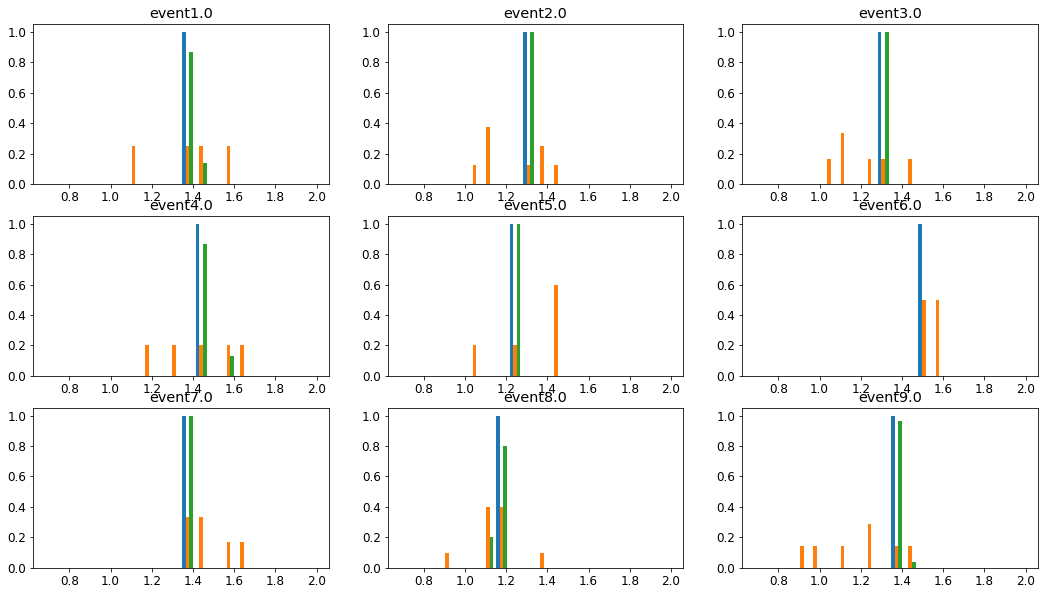

In [22]:
skipFirstN=0

fig, ax = plt.subplots(3,3,figsize=(18,10))
ax=ax.flatten()
data=df_weightsData[:100]
print(data.eventNumber.unique())
count=0
binedges2=np.histogram(df_thrownData.Mpi0etas,bins=20)[1]
for ievent,event in enumerate(data.eventNumber.unique()):
    if ievent < skipFirstN:
        continue
    if count < 9:
        print("Filling for event {0}".format(int(event)))
        dataSubset=data[data.eventNumber==event]
        print(sum(dataSubset.probWeights))
        assert(sum(dataSubset.probWeights)-1<0.0001)
        if(len(dataSubset)==1):
            continue
        ax[count].set_title("event"+str(event))
        ax[count].hist([dataSubset["Mpi0etas"],dataSubset["Mpi0etas"],dataSubset["Mpi0etas"]],
        weights=[dataSubset["bestChiWeights"],dataSubset["equalWeights"],
        dataSubset["probWeights"]],bins=binedges2,label=["bestChiSq","equalWeights","probWeights"])
        count+=1
    else:
        break

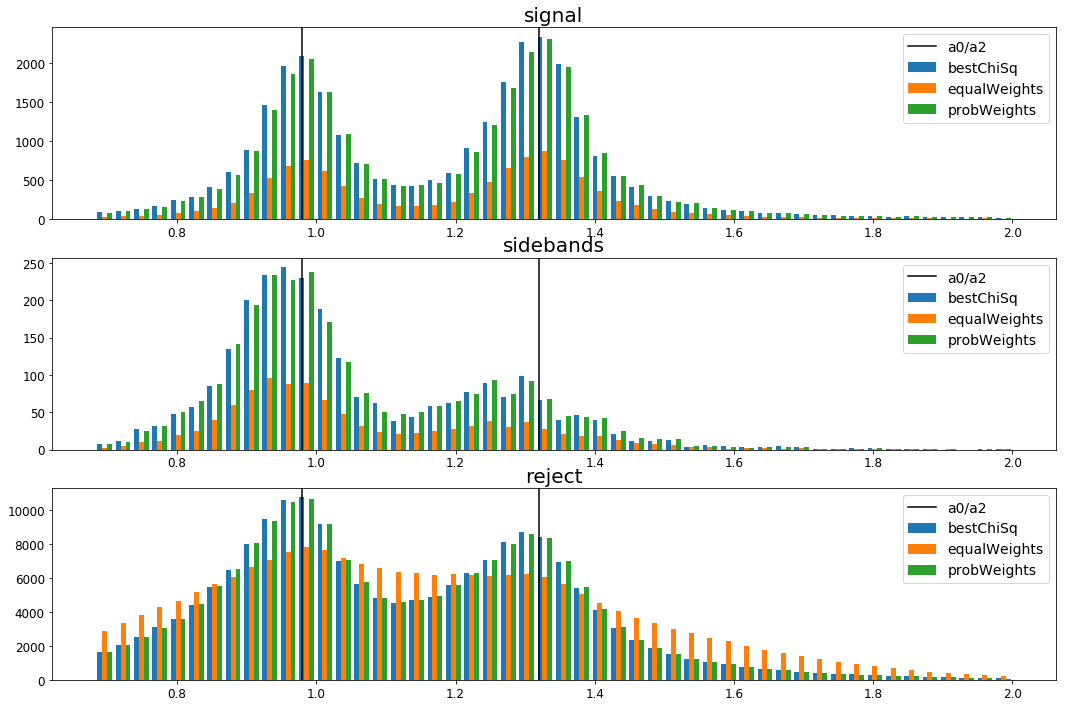

In [23]:
fig,axes=plt.subplots(3,1,figsize=(18,12))
labels=["signal", "sidebands", "reject"]
for iax,ax in enumerate(axes.flatten()):
    df_weightsDataSubset=df_weightsData[df_weightsData.whichSignalRegions==(iax+1)]
    ax.hist([df_weightsDataSubset["Mpi0etas"],df_weightsDataSubset["Mpi0etas"],df_weightsDataSubset["Mpi0etas"]],
            weights=[df_weightsDataSubset["bestChiWeights"],df_weightsDataSubset["equalWeights"],
                     df_weightsDataSubset["probWeights"]],
            bins=binedges,label=["bestChiSq","equalWeights","probWeights"])
    ax.axvline(1.32,c='black',label="a0/a2")
    ax.axvline(0.98,c='black')
    ax.set_title(labels[iax],size=20)
    ax.legend(loc=0, prop={'size': 14})